In [25]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os 
os.chdir(f"{os.getenv('HOME')}/r1_hackathon")

In [26]:
### Load the data

# Garden Path:
gp_data_dir = "./outputs/garden_path"
gp_base_df = pd.DataFrame()
for run in [1,2,3,4,5]:
    df = pd.read_csv(f"{gp_data_dir}/run{run}.csv")
    df["run"] = [run]*len(df)
    gp_base_df = pd.concat([gp_base_df, df])

gp_data = gp_base_df.copy()
gp_data = gp_data.rename(columns={"Unnamed: 0": "id"}) # Hacky way of coding in ID


# Agreement:
ag_data_dir = "./outputs/agreement"
ag_base_df = pd.DataFrame()
for run in [1,2,3,4,5]:
    df = pd.read_csv(f"{ag_data_dir}/run{run}.csv")
    df["run"] = [run]*len(df)
    ag_base_df = pd.concat([ag_base_df, df])

ag_data = ag_base_df.copy()

# Escher Sentences:
ci_data_dir = "./outputs/comparative_illusion/"
ci_base_df = pd.DataFrame()
for run in [1,2,3,4,5]:
    df = pd.read_csv(f"{ci_data_dir}/run{run}.csv")
    df["run"] = [run]*len(df)
    ci_base_df = pd.concat([ci_base_df, df])

ci_data = ci_base_df.copy()

In [27]:
### Add extracted thoughts and answers:
# A regex to extract text between a <THINK> and </THINK> tag:
def extract_think(text):
    try:
        return re.search(r'<think>([\s\S]*?)<\/think>', text).group(0)
    except AttributeError:
        return ""

# A regex to extract all other text (not in a <THINK>, and excluding the tags themselves):
def extract_answer(text):
    return re.sub(r'<think>([\s\S]*?)<\/think>', "", text) 

# Garden Path data:
gp_data['gp_thought'] = gp_data['gp_response'].apply(extract_think)
gp_data['gp_answer'] = gp_data['gp_response'].apply(extract_answer)
gp_data['non_gp_thought'] = gp_data['non_gp_response'].apply(extract_think)
gp_data['non_gp_answer'] = gp_data['non_gp_response'].apply(extract_answer)

# Agreement data:
ag_data['thought'] = ag_data['response'].apply(extract_think)
ag_data['answer'] = ag_data['response'].apply(extract_answer)

# Comparative Illusion data:
ci_data['illusion_thought'] = ci_data['illusion_response'].apply(extract_think)
ci_data['illusion_answer'] = ci_data['illusion_response'].apply(extract_answer)
ci_data['control_thought'] = ci_data['control_response'].apply(extract_think)
ci_data['control_answer'] = ci_data['control_response'].apply(extract_answer)

In [28]:
### Add lengths in words:

# Garden Path data:
gp_data['gp_thought_len'] = gp_data['gp_thought'].apply(lambda x: len(x.split()))
gp_data['gp_answer_len'] = gp_data['gp_answer'].apply(lambda x: len(x.split()))
gp_data['non_gp_thought_len'] = gp_data['non_gp_thought'].apply(lambda x: len(x.split()))
gp_data['non_gp_answer_len'] = gp_data['non_gp_answer'].apply(lambda x: len(x.split()))
gp_data['thought_len_diff'] = gp_data['gp_thought_len'] - gp_data['non_gp_thought_len']

# Agreement data:
ag_data['thought_len'] = ag_data['thought'].apply(lambda x: len(x.split()))
ag_data['answer_len'] = ag_data['answer'].apply(lambda x: len(x.split()))

# Comparative Illusion data:
ci_data['illusion_thought_len'] = ci_data['illusion_thought'].apply(lambda x: len(x.split()))
ci_data['illusion_answer_len'] = ci_data['illusion_answer'].apply(lambda x: len(x.split()))
ci_data['control_thought_len'] = ci_data['control_thought'].apply(lambda x: len(x.split()))
ci_data['control_answer_len'] = ci_data['control_answer'].apply(lambda x: len(x.split()))
ci_data['thought_len_diff'] = ci_data['illusion_thought_len'] - ci_data['control_thought_len']

In [29]:
### Adding keyword counts:
keywords = ["wait", "recheck", "alternatively", "retry", "however"] # First stab

# Return a dictionary of keyword counts:

# Garden Path data:
gp_data['gp_thought_keywords'] = gp_data['gp_thought'].apply(lambda x: {k: x.lower().count(k) for k in keywords})
gp_data['gp_answer_keywords'] = gp_data['gp_answer'].apply(lambda x: {k: x.lower().count(k) for k in keywords})
gp_data['non_gp_thought_keywords'] = gp_data['non_gp_thought'].apply(lambda x: {k: x.lower().count(k) for k in keywords})
gp_data['non_gp_answer_keywords'] = gp_data['non_gp_answer'].apply(lambda x: {k: x.lower().count(k) for k in keywords})
gp_data['gp_thought_keyword_count'] = gp_data['gp_thought_keywords'].apply(lambda x: sum(x.values()))
gp_data['gp_answer_keyword_count'] = gp_data['gp_answer_keywords'].apply(lambda x: sum(x.values()))
gp_data['non_gp_thought_keyword_count'] = gp_data['non_gp_thought_keywords'].apply(lambda x: sum(x.values()))
gp_data['non_gp_answer_keyword_count'] = gp_data['non_gp_answer_keywords'].apply(lambda x: sum(x.values()))

# Agreement data:
ag_data['thought_keywords'] = ag_data['thought'].apply(lambda x: {k: x.lower().count(k) for k in keywords})
ag_data['answer_keywords'] = ag_data['answer'].apply(lambda x: {k: x.lower().count(k) for k in keywords})
ag_data['thought_keyword_count'] = ag_data['thought_keywords'].apply(lambda x: sum(x.values()))
ag_data['answer_keyword_count'] = ag_data['answer_keywords'].apply(lambda x: sum(x.values()))

# Comparative Illusion data:
ci_data['illusion_thought_keywords'] = ci_data['illusion_thought'].apply(lambda x: {k: x.lower().count(k) for k in keywords})
ci_data['illusion_answer_keywords'] = ci_data['illusion_answer'].apply(lambda x: {k: x.lower().count(k) for k in keywords})
ci_data['control_thought_keywords'] = ci_data['control_thought'].apply(lambda x: {k: x.lower().count(k) for k in keywords})
ci_data['control_answer_keywords'] = ci_data['control_answer'].apply(lambda x: {k: x.lower().count(k) for k in keywords})
ci_data['illusion_thought_keyword_count'] = ci_data['illusion_thought_keywords'].apply(lambda x: sum(x.values()))
ci_data['illusion_answer_keyword_count'] = ci_data['illusion_answer_keywords'].apply(lambda x: sum(x.values()))
ci_data['control_thought_keyword_count'] = ci_data['control_thought_keywords'].apply(lambda x: sum(x.values()))
ci_data['control_answer_keyword_count'] = ci_data['control_answer_keywords'].apply(lambda x: sum(x.values()))


### Garden Path Stuff:

In [12]:
### Look at a sample:
index = 90
sample = gp_data.iloc[index]

for column in sample.index:
    print(f"{column}: {sample[column]}")
    print("\n")


id: 90


gp_sentence: While Jim bathed the child giggled with delight.


non_gp_sentence: The child giggled with delight while Jim bathed.


question: Is it true that Jim bathed the child?


semantic_plausibility: 1


gp_response: <think>
Okay, let's see. The sentence is "While Jim bathed the child giggled with delight." The question is asking if it's true that Jim bathed the child. Hmm. First, I need to parse the sentence correctly. The structure here is a bit ambiguous because of the way it's written. The original sentence doesn't have a comma, which can change the meaning.

So, "While Jim bathed the child giggled with delight." Without a comma after "bathed," it might be read as "While Jim bathed, the child giggled with delight." That would mean that Jim was taking a bath himself, and the child was giggling. But if the comma is missing, could it be interpreted as Jim bathing the child? Let me think. If it's written as "While Jim bathed the child, giggled with delight," but that's no

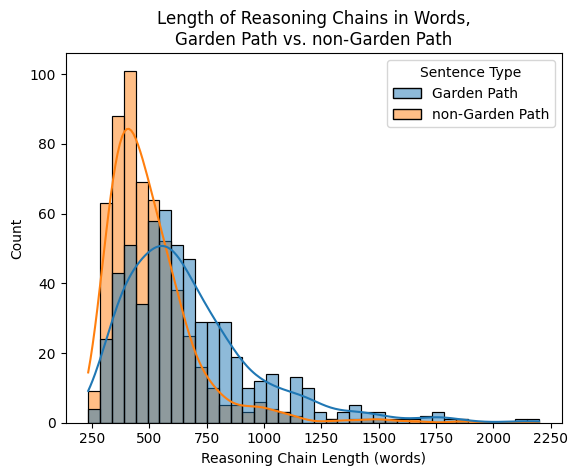

In [9]:
### Make some plots:
# Plot the distribution of thought lengths, split by GP/non-GP:

# Transform data using pd.melt, so that each row only has one type (GP/non-GP):
id_vars = [col for col in gp_data.columns if col not in ['gp_thought_len', 'non_gp_thought_len']]
gp_data_melted = pd.melt(gp_data, id_vars=id_vars, value_vars=['gp_thought_len', 'non_gp_thought_len'], var_name='Sentence Type', value_name='thought_len')
sns.histplot(data=gp_data_melted, x='thought_len', hue='Sentence Type', kde=True)
# Add labels: 
# 'type': 'Sentence Type'
# 'gp_thought_len': 'Garden Path'
# 'non_gp_thought_len': 'non-Garden Path'
plt.xlabel("Reasoning Chain Length (words)")
plt.ylabel("Count")
plt.title("Length of Reasoning Chains in Words,\nGarden Path vs. non-Garden Path")

# Change legend labels
legend_labels = {'gp_thought_len': 'Garden Path', 'non_gp_thought_len': 'non-Garden Path'}
for t in plt.gca().get_legend().texts:
    t.set_text(legend_labels[t.get_text()])

plt.show()

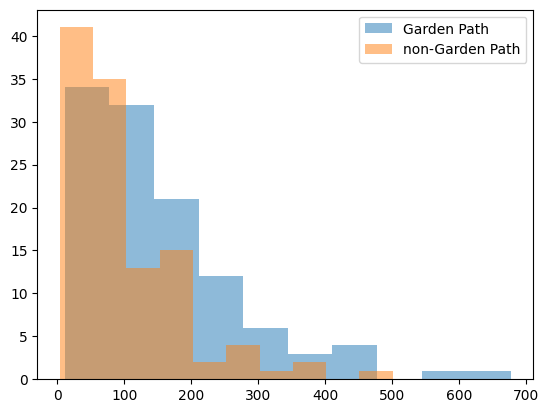

In [10]:
### Variance of thought lengths:
# Calculate the standard deviation of thought lengths for each datapoint:
gp_thought_vars = []
non_gp_thought_vars = []
for id in np.unique(gp_data['id']):
    indexed = gp_data[gp_data['id'] == id]
    gp_thought_var = np.std(indexed['gp_thought_len'])
    non_gp_thought_var = np.std(indexed['non_gp_thought_len'])
    gp_thought_vars.append(gp_thought_var)
    non_gp_thought_vars.append(non_gp_thought_var)

# Plot the variance of thought lengths:
plt.hist(gp_thought_vars, alpha=0.5, label='Garden Path')
plt.hist(non_gp_thought_vars, alpha=0.5, label='non-Garden Path')
plt.legend()


In [11]:

### Look at super long ones:
high_non_gp_length = gp_data[gp_data['non_gp_thought_len'] > 800]

# Look at samples:
for i, row in high_non_gp_length.iterrows():
    print(f"Index: {i}")
    print(f"GP Sentence + Question: {row['gp_sentence']}. {row['question']}")
    print(f"GP Thought Length: {row['gp_thought_len']}")
    print(f"GP Thought: {row['gp_thought']}")
    print(f"Non-GP Thought Length: {row['non_gp_thought_len']}")
    print(f"Non-GP Thought: {row['non_gp_thought']}")
    print(f"GP Answer: {row['gp_answer']}")
    print(f"Non-GP Answer: {row['non_gp_answer']}")
    print("\n")


Index: 8
GP Sentence + Question: While the architect drew the building represented modern times style.. Is it true that the architect drew the building?
GP Thought Length: 348
GP Thought: <think>
Okay, let's take a look at this question. The user provided the sentence: "While the architect drew the building represented modern times style." Then they ask if it's true that the architect drew the building.

First, I need to parse the original sentence. The structure seems a bit off. The main clause is "the architect drew the building," but there's a dependent clause starting with "while." The phrase "represented modern times style" is attached without a clear connection. Maybe there's a missing word or a punctuation error here. Let me break it down.

The sentence starts with "While the architect drew the building..." which sets up a dependent clause. Then it continues with "represented modern times style." Wait, that part doesn't have a subject. It should probably be something like "which

<Axes: xlabel='keyword_count', ylabel='Count'>

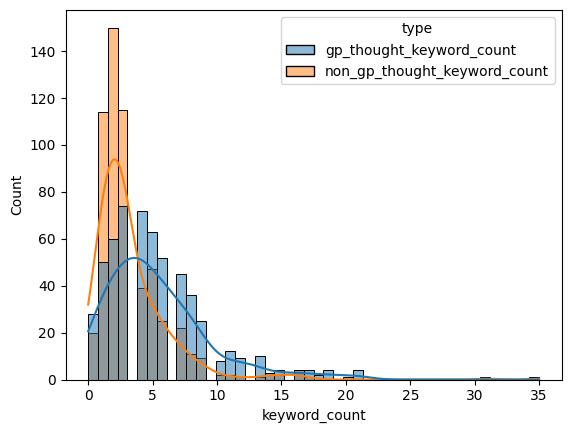

In [10]:
gp_data_melted = pd.melt(gp_data, value_vars=['gp_thought_keyword_count', 'non_gp_thought_keyword_count'], var_name='type', value_name='keyword_count')
sns.histplot(data=gp_data_melted, x='keyword_count', hue='type', kde=True)


Text(0.5, 1.0, "'Thought' Lengths for Garden Path vs.\nNon-Garden Path Prompts")

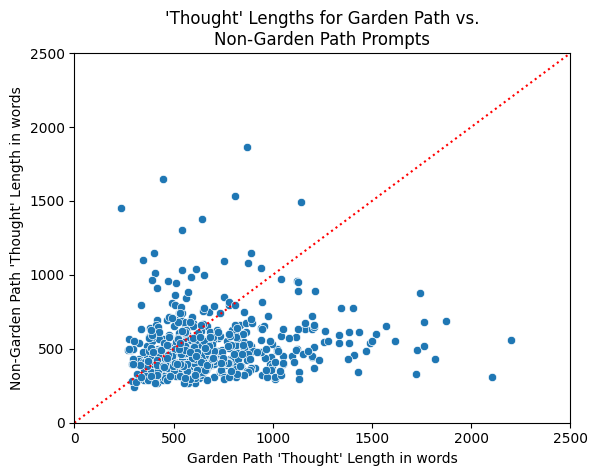

In [11]:
sns.scatterplot(data=gp_data, x='gp_thought_len', y='non_gp_thought_len')
plt.xlim((0,2500))
plt.ylim((0,2500))
# Overlay dotted y=x line:
plt.plot([0, 2500], [0, 2500], color='red', linestyle='dotted')

plt.xlabel("Garden Path 'Thought' Length in words")
plt.ylabel("Non-Garden Path 'Thought' Length in words")

plt.title("'Thought' Lengths for Garden Path vs.\nNon-Garden Path Prompts")

Text(0.5, 1.0, 'Difference in Reasoning Chain Lengths for Garden Path vs.\nNon-Garden Path Prompts')

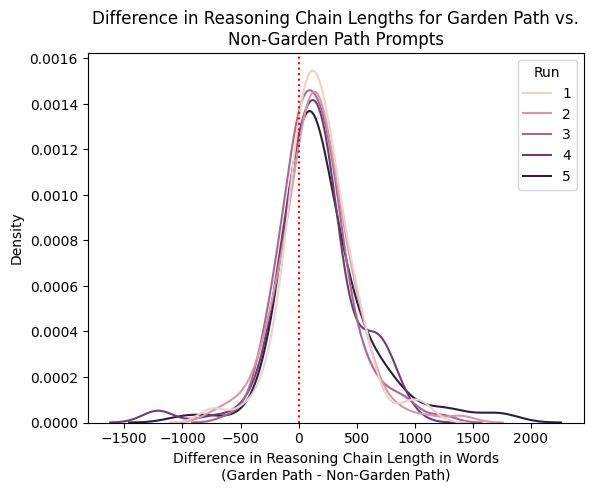

In [12]:
gp_data = gp_data.rename(columns={"run": "Run"})
sns.kdeplot(data=gp_data, x='thought_len_diff', hue='Run', fill=False, common_norm=False)
# Add a vertical line at 0:
plt.axvline(0, color='red', linestyle='dotted')
plt.xlabel("Difference in Reasoning Chain Length in Words\n(Garden Path - Non-Garden Path)")
plt.ylabel("Density")
plt.title("Difference in Reasoning Chain Lengths for Garden Path vs.\nNon-Garden Path Prompts")

In [13]:
### Aggregate data across runs:
# Basically do this, but also add columns for std: data.groupby('id').agg({'gp_thought_len': 'mean', 'non_gp_thought_len': 'mean'})
gp_data_agg = gp_data.groupby('id').agg({'gp_thought_len': ['mean', 'std'], 'non_gp_thought_len': ['mean', 'std'], 'gp_sentence': 'first', 'non_gp_sentence': 'first'})
gp_data_agg.columns = ['_'.join(col).strip() for col in gp_data_agg.columns.values]
gp_data_agg

,gp_thought_len_mean,gp_thought_len_std,non_gp_thought_len_mean,non_gp_thought_len_std,gp_sentence_first,non_gp_sentence_first
id,,,,,,
0,472.8,101.659727,507.2,160.301903,While the secretary typed the memo neared comp...,The memo neared completion while the secretary...
1,345.0,56.811090,401.4,171.184988,While the secretary typed the drawing neared c...,The drawing neared completion while the secret...
2,471.2,68.863633,578.8,142.213572,While the explorer paddled the canoe headed to...,The canoe headed toward a waterfall while the ...
3,609.8,74.052009,460.8,172.045633,While the explorer paddled the yacht headed to...,The yacht headed toward a waterfall while the ...
4,821.2,186.825319,415.6,213.930596,While the cowboy rode the horse sweated profus...,The horse sweated profusely while the cowboy r...
...,...,...,...,...,...,...
109,740.2,340.611509,499.0,58.604607,While the dog moved the bone went bad.,The bone went bad while the dog moved.
110,813.0,199.468043,578.6,179.667192,While the river flooded the valley kept on liv...,The valley kept on living quietly while the ri...
111,942.0,356.948176,527.6,31.500794,While the log broke the window moved on its axis.,The window moved on its axis while the log broke.


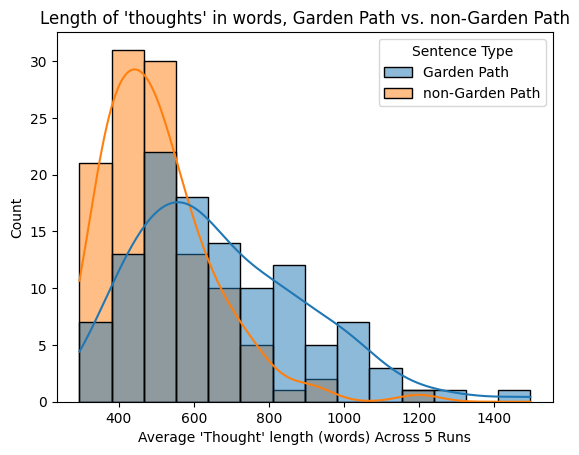

In [14]:
# Transform data using pd.melt, so that each row only has one type (GP/non-GP):
id_vars = [col for col in gp_data_agg.columns if col not in ['gp_thought_len', 'non_gp_thought_len']]
gp_data_melted = pd.melt(gp_data_agg, value_vars=['gp_thought_len_mean', 'non_gp_thought_len_mean'], var_name='Sentence Type', value_name='thought_len_mean')

sns.histplot(data=gp_data_melted, x='thought_len_mean', hue='Sentence Type', kde=True)
# Add labels: 
# 'type': 'Sentence Type'
# 'gp_thought_len': 'Garden Path'
# 'non_gp_thought_len': 'non-Garden Path'
plt.xlabel("Average 'Thought' length (words) Across 5 Runs")
plt.ylabel("Count")
plt.title("Length of 'thoughts' in words, Garden Path vs. non-Garden Path")

# Change legend labels
legend_labels = {'gp_thought_len_mean': 'Garden Path', 'non_gp_thought_len_mean': 'non-Garden Path'}
for t in plt.gca().get_legend().texts:
    t.set_text(legend_labels[t.get_text()])

plt.show()

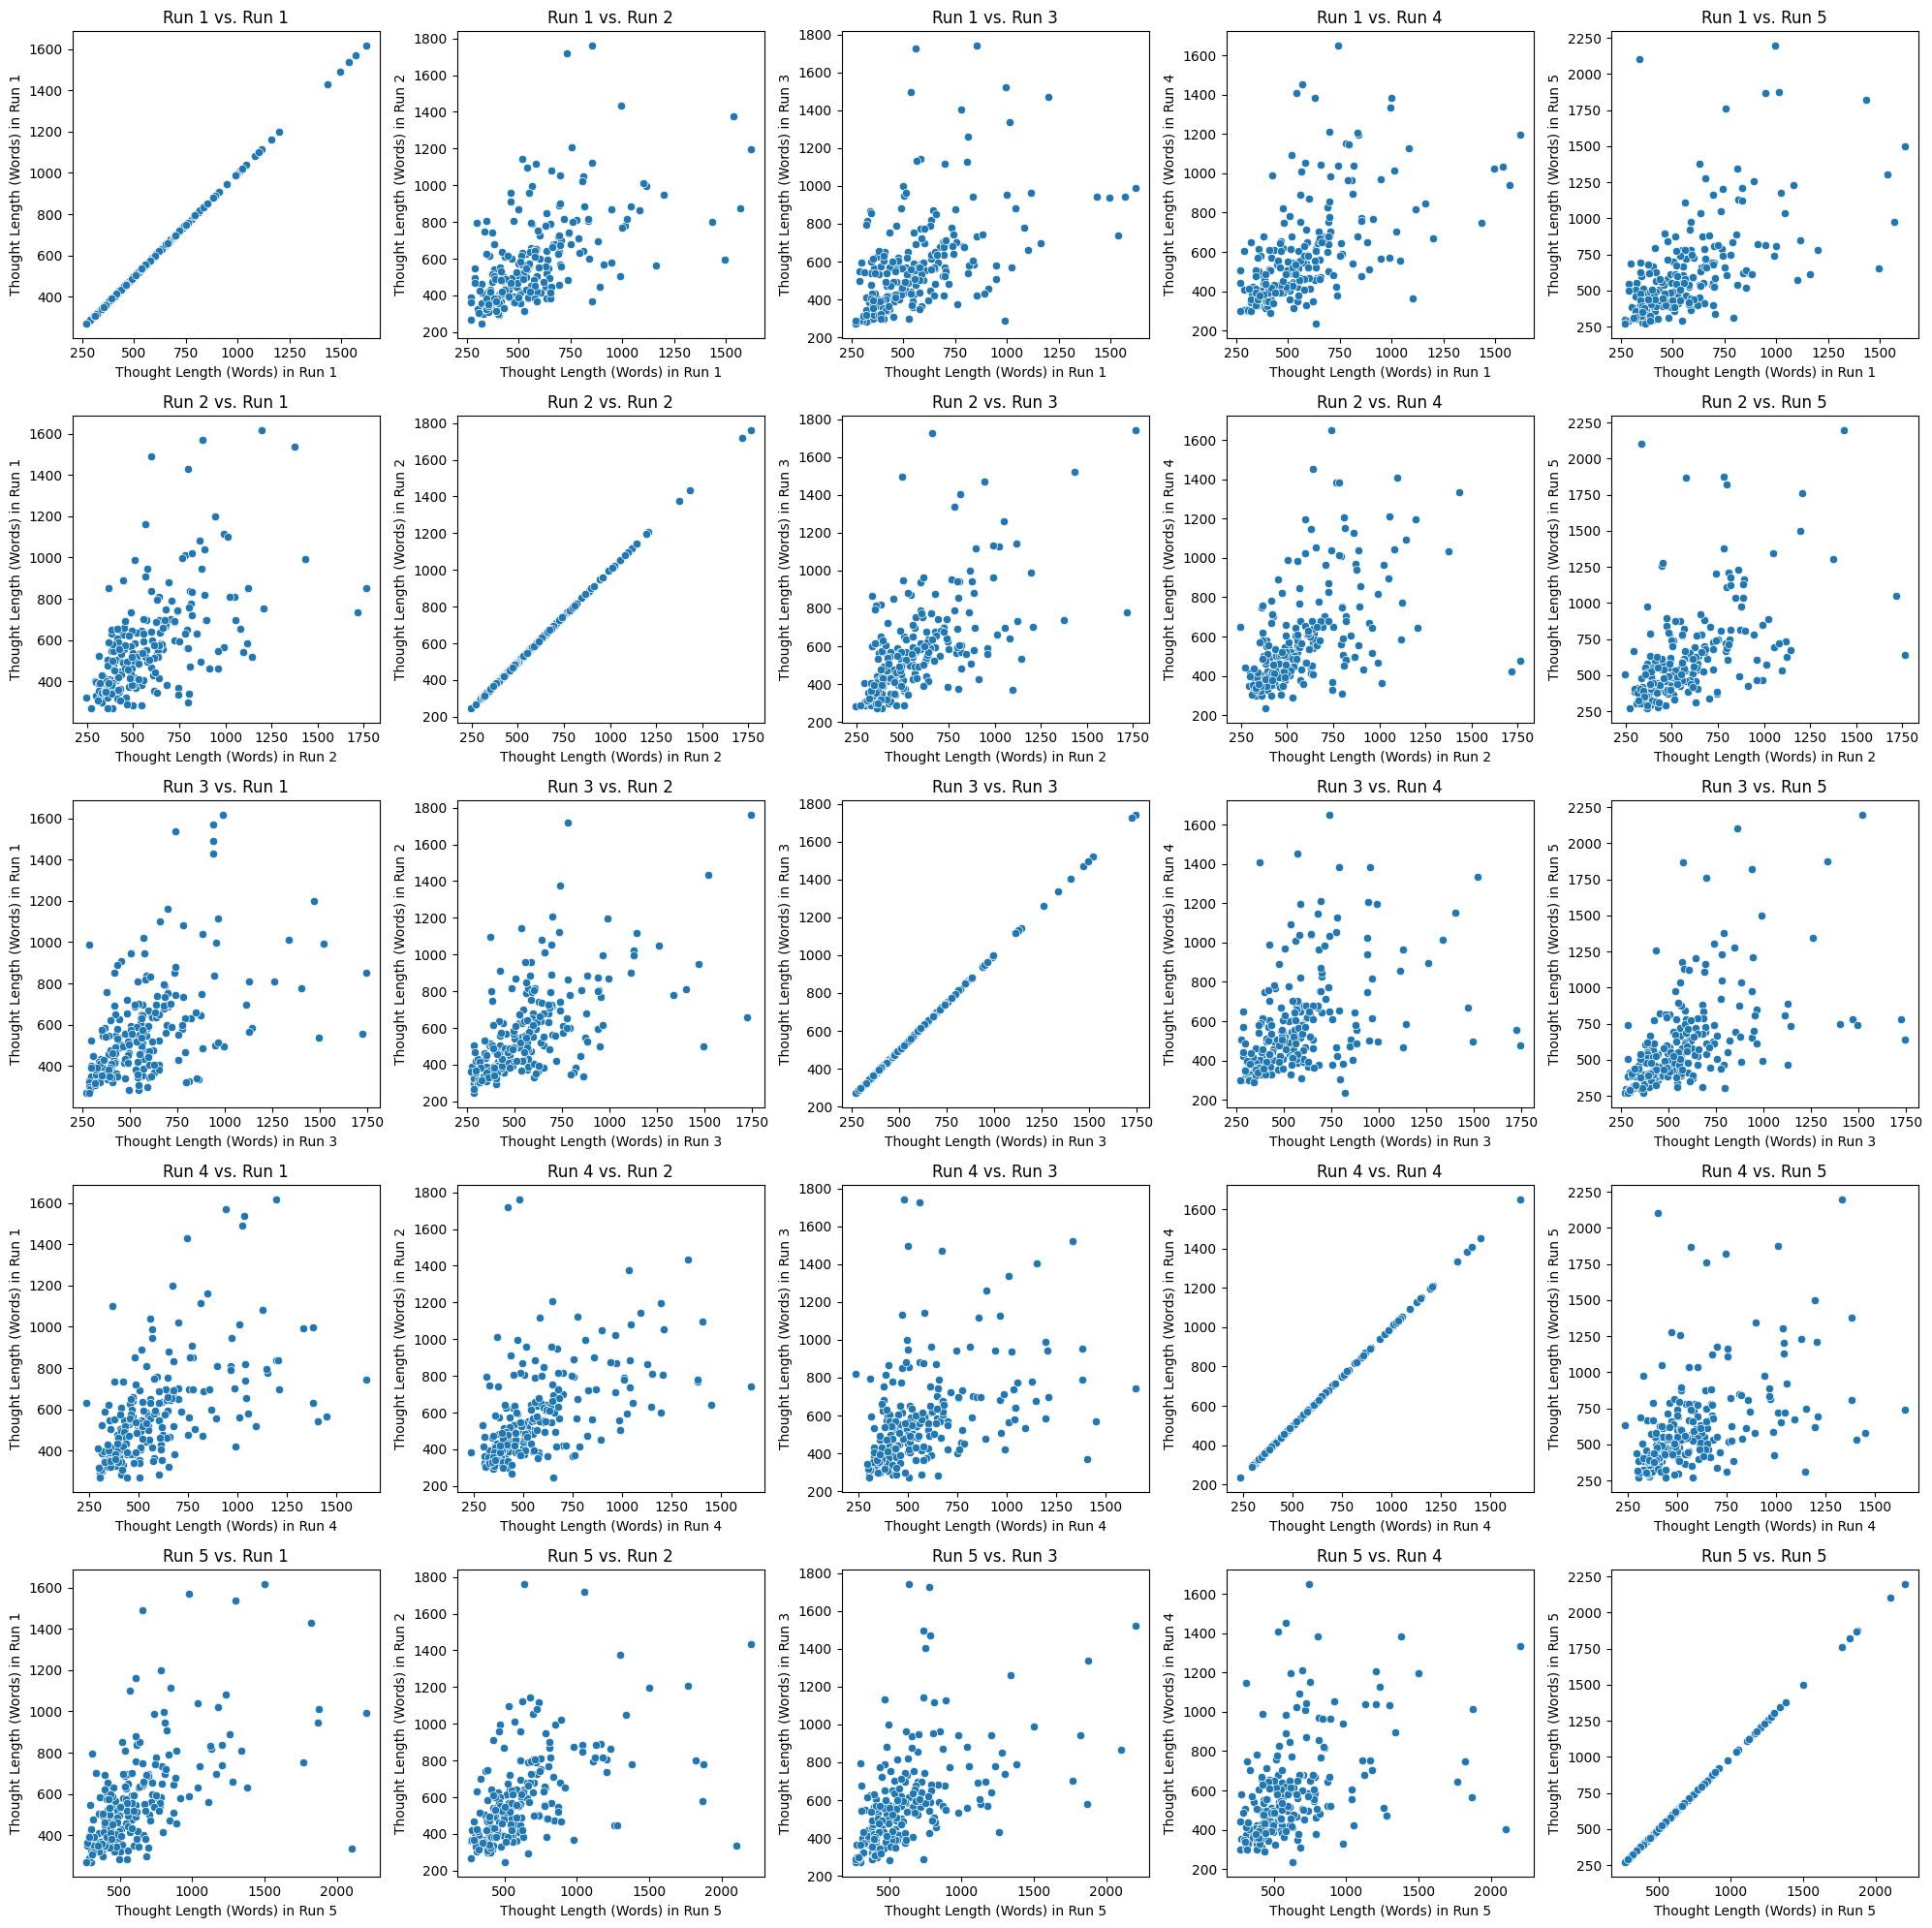

In [15]:
runwise_dfs = {}
for run in [1,2,3,4,5]:
    runwise_df = gp_data[gp_data['Run'] == run]
    # Now, melt the data, so that each row only has one type (GP/non-GP):
    id_vars = [col for col in runwise_df.columns if col not in ['gp_thought_len', 'non_gp_thought_len']]
    runwise_melted = pd.melt(runwise_df, id_vars=id_vars, value_vars=['gp_thought_len', 'non_gp_thought_len'], var_name='Sentence Type', value_name='thought_len')
    runwise_dfs[run] = runwise_melted


# Now create a grid of plots:
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
for x, run_x in enumerate([1,2,3,4,5]):
    for y, run_y in enumerate([1,2,3,4,5]):
        sns.scatterplot(x=runwise_dfs[run_x]['thought_len'], y=runwise_dfs[run_y]['thought_len'], ax=axs[x, y])
        axs[x, y].set_title(f"Run {run_x} vs. Run {run_y}")
        axs[x, y].set_xlabel(f"Thought Length (Words) in Run {run_x}")
        axs[x, y].set_ylabel(f"Thought Length (Words) in Run {run_y}")
        # Change legend labels
        legend_labels = {'gp_thought_len': 'Garden Path', 'non_gp_thought_len': 'non-Garden Path'}

plt.tight_layout()
plt.show()

In [16]:
# Calculate bootstrapped C.I.s of difference in thought lengths, within each run:
from scipy.stats import bootstrap
import random

for run in [1,2,3,4,5]:
    run_df = gp_data[gp_data['Run'] == run]
    thought_len_difference_bCIs = bootstrap((run_df['thought_len_diff'],), np.mean, confidence_level=0.95, n_resamples=10000, method='percentile', random_state=3535)
    print(f"Run {run}: Mean difference in thought lengths: {np.mean(run_df['thought_len_diff'])}")
    print(f"Run {run}: 95% C.I. of difference in thought lengths: {thought_len_difference_bCIs.confidence_interval}")
    print("\n")




Run 1: Mean difference in thought lengths: 172.19298245614036
Run 1: 95% C.I. of difference in thought lengths: ConfidenceInterval(low=np.float64(119.39429824561404), high=np.float64(226.43092105263156))


Run 2: Mean difference in thought lengths: 151.76315789473685
Run 2: 95% C.I. of difference in thought lengths: ConfidenceInterval(low=np.float64(94.62061403508774), high=np.float64(209.09846491228066))


Run 3: Mean difference in thought lengths: 151.859649122807
Run 3: 95% C.I. of difference in thought lengths: ConfidenceInterval(low=np.float64(99.49934210526317), high=np.float64(206.61513157894734))


Run 4: Mean difference in thought lengths: 147.16666666666666
Run 4: 95% C.I. of difference in thought lengths: ConfidenceInterval(low=np.float64(83.28026315789474), high=np.float64(209.90526315789472))


Run 5: Mean difference in thought lengths: 222.82456140350877
Run 5: 95% C.I. of difference in thought lengths: ConfidenceInterval(low=np.float64(152.12258771929825), high=np.float6

In [18]:
# Correlations with human response time:

# Load the human response time data:
human_data = pd.read_csv("./Amouyal2025_sampled_human_results.csv")
human_data = human_data.rename(columns={"id": "workerid"}).drop(columns=['Unnamed: 0'])
human_data = human_data.sort_values(by=['set_id', 'sent_type', 'quest_type'])
human_data = human_data[human_data['quest_type'] == 'GP_question'].drop(columns=['quest_type'])
human_data['garden_path'] = human_data['sent_type'].apply(lambda x: 'non_gp' if 'nonGP' in x else 'gp')

# Add ids from the gp_data to the human_data: sentences are the same, so we can use them to match:
# gp_data_agg

aggregation_function = 'median'

# Group by set_id, sent_type, quest_type, and then show the first sentence and question within each group:
human_data_grouped = human_data.groupby(['set_id', 'sent_type']).agg({'sentence': 'first', 'question': 'first', 'time': aggregation_function, 'corr':'mean', 'garden_path': 'first'})
set_ids = np.unique([idx[0] for idx in human_data_grouped.index])

dictlist = []
for set_id in set_ids:
    set_indexed = human_data_grouped.loc[set_id]
    if not 'GP_reflexive' in set_indexed.index:
        gp_implausible = set_indexed.loc['GP_improb']
        gp_plausible = set_indexed.loc['GP_prob']
        non_gp_implausible = set_indexed.loc['nonGP_improb']
        non_gp_plausible = set_indexed.loc['nonGP_prob']
        plausible_dict = {"sentence_gp": gp_plausible['sentence'], "sentence_non_gp": non_gp_plausible['sentence'], "question": gp_plausible['question'], f"{aggregation_function}_time_gp": gp_plausible['time'], f"{aggregation_function}_time_non_gp": non_gp_plausible['time'], "mean_acc_gp": gp_plausible['corr'], "mean_acc_non_gp": non_gp_plausible['corr'], "plausible": 1}
        implausible_dict = {"sentence_gp": gp_implausible['sentence'], "sentence_non_gp": non_gp_implausible['sentence'], "question": gp_implausible['question'], f"{aggregation_function}_time_gp": gp_implausible['time'], f"{aggregation_function}_time_non_gp": non_gp_implausible['time'], "mean_acc_gp": gp_implausible['corr'], "mean_acc_non_gp": non_gp_implausible['corr'], "plausible": 0}
        dictlist.append(plausible_dict)
        dictlist.append(implausible_dict)
    else:
        gp_reflexive = set_indexed.loc['GP_reflexive']
        non_gp_reflexive = set_indexed.loc['nonGP_reflexive']
        reflexive_dict = {"sentence_gp": gp_reflexive['sentence'], "sentence_non_gp": non_gp_reflexive['sentence'], "question": gp_reflexive['question'], f"{aggregation_function}_time_gp": gp_reflexive['time'], f"{aggregation_function}_time_non_gp": non_gp_reflexive['time'], "mean_acc_gp": gp_reflexive['corr'], "mean_acc_non_gp": non_gp_reflexive['corr'], "plausible": 1}
        dictlist.append(reflexive_dict)

human_data_agg = pd.DataFrame(dictlist)

human_model_merged = pd.merge(gp_data_agg.rename(columns={'gp_sentence_first': 'sentence_gp', 'non_gp_sentence_first': 'sentence_non_gp'}), human_data_agg, on=['sentence_gp', 'sentence_non_gp'])

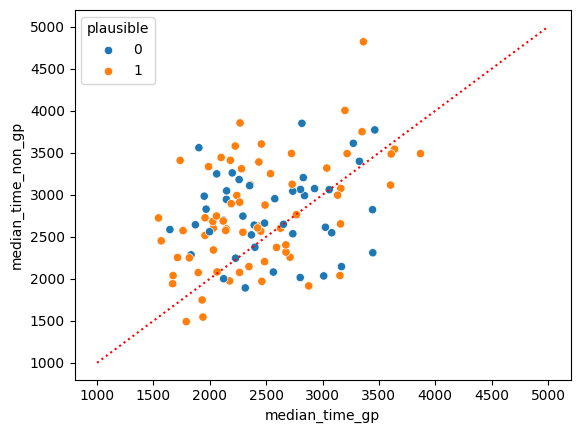

In [19]:
gp_data_melted = pd.melt(human_model_merged, value_vars=[f'{aggregation_function}_time_gp', f'{aggregation_function}_time_non_gp'], var_name='Sentence Type', value_name=f'{aggregation_function}_time')
sns.scatterplot(data=human_model_merged, x=f'{aggregation_function}_time_gp', y=f'{aggregation_function}_time_non_gp', hue='plausible')
# Overlay dotted y=x line:
plt.plot([1000, 5000], [1000, 5000], color='red', linestyle='dotted')


PearsonRResult(statistic=np.float64(-0.5140243846703055), pvalue=np.float64(7.919222660751907e-09))
SignificanceResult(statistic=np.float64(-0.5492094170806829), pvalue=np.float64(4.329986742907562e-10))


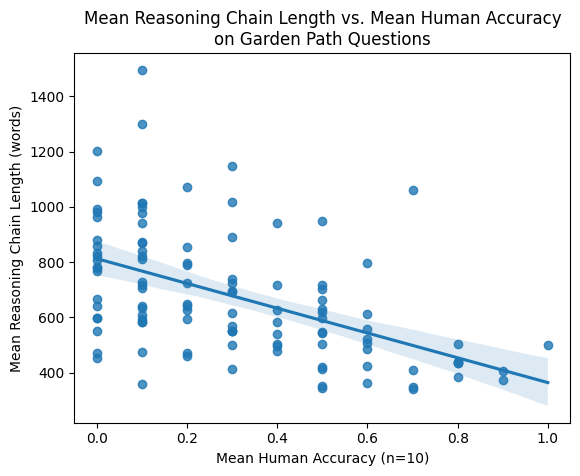

In [48]:
# sns.scatterplot(data=human_model_merged, y='gp_thought_len_mean', x='mean_acc_gp')
# Overlay regression line:
sns.regplot(data=human_model_merged, y='gp_thought_len_mean', x='mean_acc_gp')
plt.xlabel("Mean Human Accuracy (n=10)")
plt.ylabel("Mean Reasoning Chain Length (words)")
plt.title("Mean Reasoning Chain Length vs. Mean Human Accuracy\non Garden Path Questions")

# Check for correlations:
from scipy.stats import pearsonr, spearmanr
print(pearsonr(human_model_merged['gp_thought_len_mean'], human_model_merged['mean_acc_gp']))
print(spearmanr(human_model_merged['gp_thought_len_mean'], human_model_merged['mean_acc_gp']))

PearsonRResult(statistic=np.float64(-0.5441833371043353), pvalue=np.float64(6.695508234685041e-10))
SignificanceResult(statistic=np.float64(-0.619957579797007), pvalue=np.float64(4.0050287262005e-13))


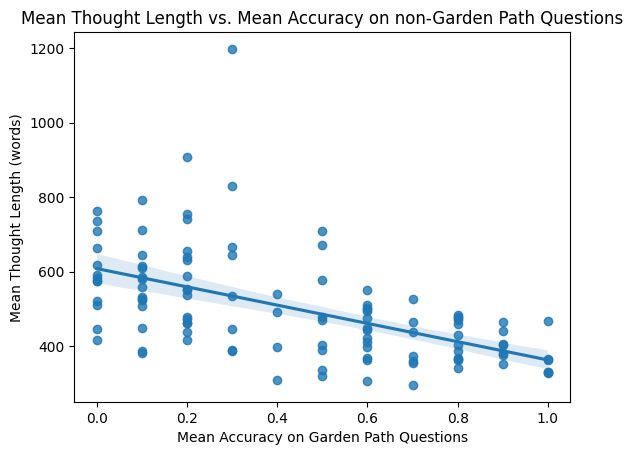

In [22]:
# sns.scatterplot(data=human_model_merged, y='gp_thought_len_mean', x='mean_acc_gp')
# Overlay regression line:
sns.regplot(data=human_model_merged, y='non_gp_thought_len_mean', x='mean_acc_non_gp')
plt.xlabel("Mean Accuracy on Garden Path Questions")
plt.ylabel("Mean Thought Length (words)")
plt.title("Mean Thought Length vs. Mean Accuracy on non-Garden Path Questions")

# Check for correlations:
from scipy.stats import pearsonr, spearmanr
print(pearsonr(human_model_merged['non_gp_thought_len_mean'], human_model_merged['mean_acc_non_gp']))
print(spearmanr(human_model_merged['non_gp_thought_len_mean'], human_model_merged['mean_acc_non_gp']))

PearsonRResult(statistic=np.float64(-0.26323387566760964), pvalue=np.float64(0.0052488015422605125))
SignificanceResult(statistic=np.float64(-0.2631301602808419), pvalue=np.float64(0.005267324044398989))


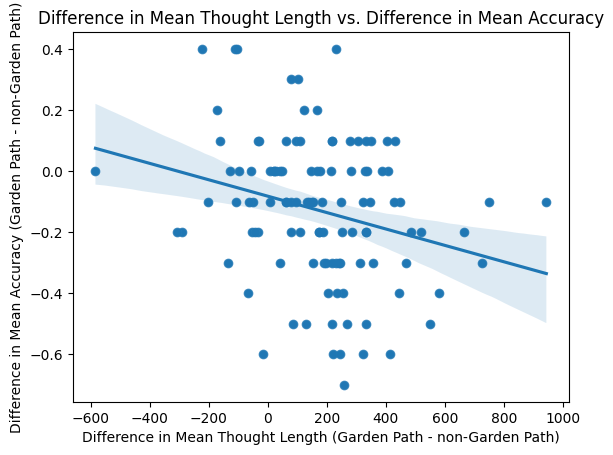

In [24]:
human_model_merged['thought_len_diff'] = human_model_merged['gp_thought_len_mean'] - human_model_merged['non_gp_thought_len_mean']
human_model_merged['mean_acc_diff'] = human_model_merged['mean_acc_gp'] - human_model_merged['mean_acc_non_gp']
sns.scatterplot(data=human_model_merged, x='thought_len_diff', y='mean_acc_diff')
# Add regression plot:
sns.regplot(data=human_model_merged, x='thought_len_diff', y='mean_acc_diff')
plt.xlabel("Difference in Mean Thought Length (Garden Path - non-Garden Path)")
plt.ylabel("Difference in Mean Accuracy (Garden Path - non-Garden Path)")
plt.title("Difference in Mean Thought Length vs. Difference in Mean Accuracy")

# Check for correlations:
from scipy.stats import pearsonr, spearmanr
print(pearsonr(human_model_merged['thought_len_diff'], human_model_merged['mean_acc_diff']))
print(spearmanr(human_model_merged['thought_len_diff'], human_model_merged['mean_acc_diff']))


Text(0.5, 1.0, 'Mean Accuracy on Garden Path vs. non-Garden Path Questions')

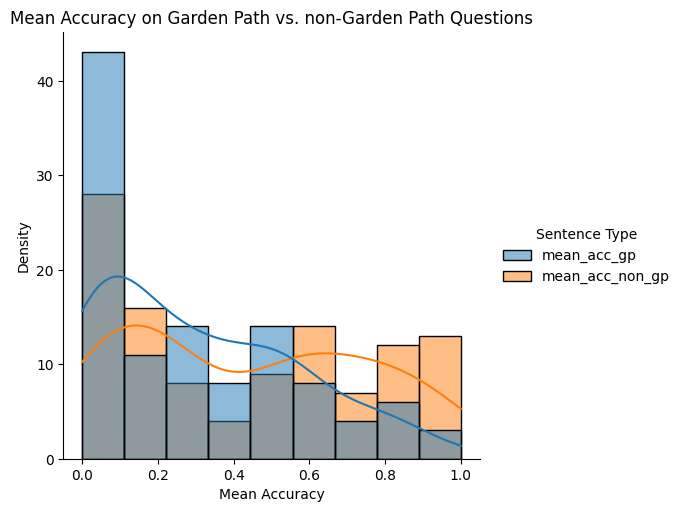

In [28]:
mean_acc_melted = pd.melt(human_model_merged[['mean_acc_gp', 'mean_acc_non_gp']], var_name='Sentence Type', value_name='mean_acc')

sns.displot(data=mean_acc_melted, x='mean_acc', hue='Sentence Type', kde=True)
plt.xlabel("Mean Accuracy")
plt.ylabel("Density")
plt.title("Mean Accuracy on Garden Path vs. non-Garden Path Questions")


In [30]:
print(f"Mean difference in accuracy (GP - non-GP): {np.mean(human_model_merged['mean_acc_diff'])}")
bootstrapped_results = bootstrap((human_model_merged['mean_acc_diff'],), np.mean, confidence_level=0.95, n_resamples=10000, method='percentile', random_state=3535)

print(f"95% C.I. of difference in accuracy (GP - non-GP): {bootstrapped_results.confidence_interval}")


Mean difference in accuracy (GP - non-GP): -0.12882882882882885
95% C.I. of difference in accuracy (GP - non-GP): ConfidenceInterval(low=np.float64(-0.17207207207207212), high=np.float64(-0.0855855855855856))


In [149]:
import pandas as pd

# Assuming human_model_merged is your DataFrame
# Melt the DataFrame to long format
human_model_merged['id'] = human_model_merged.index  # Replace 'id' with the actual identifier column(s)
melted_df = pd.melt(human_model_merged, 
                    id_vars=['id'],  # Replace 'id' with the actual identifier column(s)
                    value_vars=['gp_thought_len_std', 'non_gp_thought_len_std', 
                                'gp_thought_len_mean', 'non_gp_thought_len_mean', 
                                'sentence_gp', 'sentence_non_gp', 
                                'median_time_gp', 'median_time_non_gp', 
                                'mean_acc_gp', 'mean_acc_non_gp'],
                    var_name='variable', 
                    value_name='value')

# Extract 'gp' and 'non_gp' from the variable names
melted_df['type'] = melted_df['variable'].apply(lambda x: 'non_gp' if 'non_gp' in x else 'gp')
melted_df['variable'] = melted_df['variable'].str.replace('_gp', '').str.replace('_non_gp', '')

melted_df

,id,variable,value,type
0,0,gp_thought_len_std,101.659727,gp
1,1,gp_thought_len_std,56.81109,gp
2,2,gp_thought_len_std,68.863633,gp
3,3,gp_thought_len_std,74.052009,gp
4,4,gp_thought_len_std,186.825319,gp
...,...,...,...,...
1105,106,mean_acc_non,0.6,non_gp
1106,107,mean_acc_non,0.5,non_gp
1107,108,mean_acc_non,0.7,non_gp
1108,109,mean_acc_non,0.2,non_gp


### Agreement Stuff:

In [8]:
### Look at a sample:
index = 100
sample = ag_data.iloc[index]

for column in sample.index:
    print(f"{column}: {sample[column]}")
    print("\n")


target_idx: 6


correct_form: are


wrong_form: is


n_attractors: 1


sentence_grammatical: Major shopping malls along the road are the guihe shopping center (), the sofitel silver plaza, and the wanda shopping mall ().


sentence_ungrammatical: Major shopping malls along the road is the guihe shopping center (), the sofitel silver plaza, and the wanda shopping mall ().


sentence_length: 22


source_idx: 5723


order: order_1_response


response: <think>
Okay, let's tackle this question. The user is asking which of the two sentences, A or B, is grammatical and which isn't. The sentences are about major shopping malls along a road, listing three examples. 

First, I need to look at the structure of both sentences. The main difference between them is the verb used: Sentence A uses "are" while Sentence B uses "is". The subject here is "Major shopping malls along the road", which is a plural noun phrase because "malls" is plural. 

In English, the verb must agree with the subject in numb

<Axes: xlabel='n_attractors', ylabel='thought_len'>

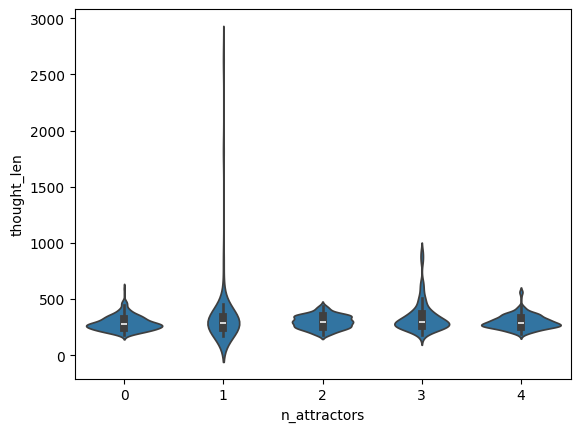

In [57]:
sns.violinplot(data=ag_data, x='n_attractors', y='thought_len')

### Comparative Illusion Stuff:

In [31]:
### Look at a sample:
index = 200
sample = ci_data.iloc[index]

for column in sample.index:
    print(f"{column}: {sample[column]}")
    print("\n")


item: 9


sentence_illusion: Today more Brazilians immigrated to Japan than Peter's mother did.


sentence_control: Today more Brazilians immigrated to Japan than Chileans did.


ellipsis: ellipsis


quantifier: more


repeatability: non-repeatable


question: Who immigrated to Japan today?


illusion_response: <think>
Okay, let's try to figure out this question. The sentence says, "Today more Brazilians immigrated to Japan than Peter's mother did. Who immigrated to Japan today?" Hmm, so the user is asking who immigrated today based on that statement.

First, I need to parse the sentence structure. The main comparison is between the number of Brazilians who immigrated today and the number that Peter's mother did. The phrase "more Brazilians immigrated... than Peter's mother did" is a bit tricky. Normally, when you use "more X than Y," you're comparing quantities. So here, "Brazilians" is a plural noun, indicating a group, and "Peter's mother" is a singular noun. 

Wait, but how can you

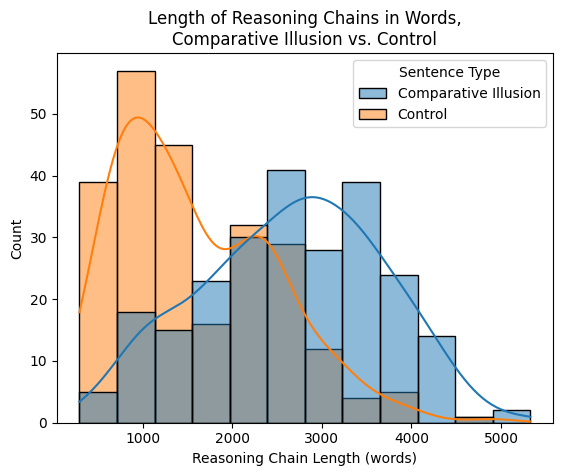

In [17]:
### Make some plots:
# Plot the distribution of thought lengths, split illusion/control:

# Transform data using pd.melt, so that each row only has one type (illusion/control):
id_vars = [col for col in ci_data.columns if col not in ['illusion_thought_len', 'control_thought_len']]
ci_data_melted = pd.melt(ci_data, id_vars=id_vars, value_vars=['illusion_thought_len', 'control_thought_len'], var_name='Sentence Type', value_name='thought_len')
sns.histplot(data=ci_data_melted, x='thought_len', hue='Sentence Type', kde=True)
# Add labels: 
# 'type': 'Sentence Type'
# 'gp_thought_len': 'Garden Path'
# 'non_gp_thought_len': 'non-Garden Path'
plt.xlabel("Reasoning Chain Length (words)")
plt.ylabel("Count")
plt.title("Length of Reasoning Chains in Words,\nComparative Illusion vs. Control")

# Change legend labels
legend_labels = {'illusion_thought_len': 'Comparative Illusion', 'control_thought_len': 'Control'}
for t in plt.gca().get_legend().texts:
    t.set_text(legend_labels[t.get_text()])

plt.show()

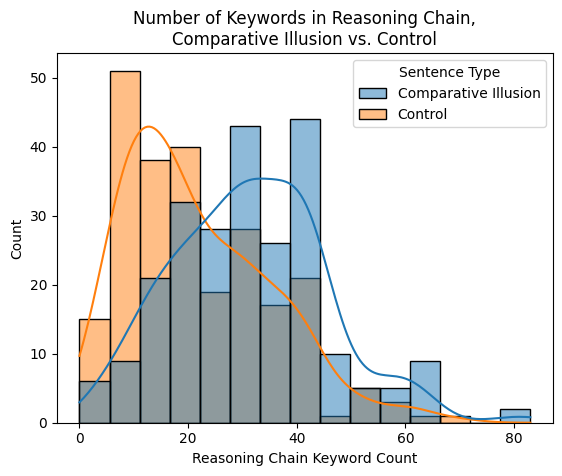

In [18]:
### Make some plots:
# Plot the distribution of thought keyword counts, split illusion/control:

# Transform data using pd.melt, so that each row only has one type (illusion/control):
id_vars = [col for col in ci_data.columns if col not in ['illusion_thought_keyword_count', 'control_thought_keyword_count']]
ci_data_melted = pd.melt(ci_data, id_vars=id_vars, value_vars=['illusion_thought_keyword_count', 'control_thought_keyword_count'], var_name='Sentence Type', value_name='keyword_count')
sns.histplot(data=ci_data_melted, x='keyword_count', hue='Sentence Type', kde=True)
# Add labels: 
# 'type': 'Sentence Type'
# 'gp_thought_len': 'Garden Path'
# 'non_gp_thought_len': 'non-Garden Path'
plt.xlabel("Reasoning Chain Keyword Count")
plt.ylabel("Count")
plt.title("Number of Keywords in Reasoning Chain,\nComparative Illusion vs. Control")

# Change legend labels
legend_labels = {'illusion_thought_keyword_count': 'Comparative Illusion', 'control_thought_keyword_count': 'Control'}
for t in plt.gca().get_legend().texts:
    t.set_text(legend_labels[t.get_text()])

plt.show()

<Axes: xlabel='control_thought_len', ylabel='control_thought_keyword_count'>

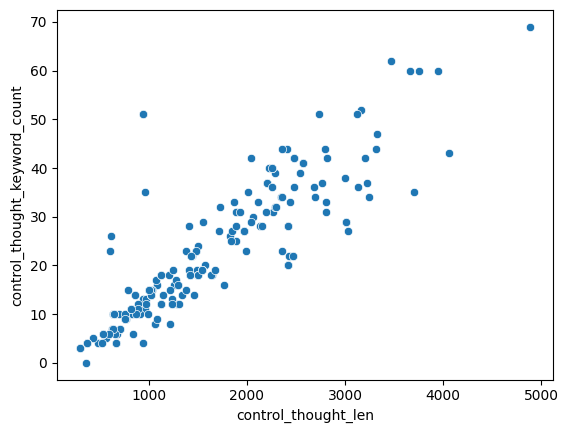

In [22]:
sns.scatterplot(data=ci_data, y='control_thought_keyword_count', x='control_thought_len')

Text(0.5, 9.444444444444438, 'Difference in Reasoning Chain Length in Words\n(Comparative Illusion - Control)')

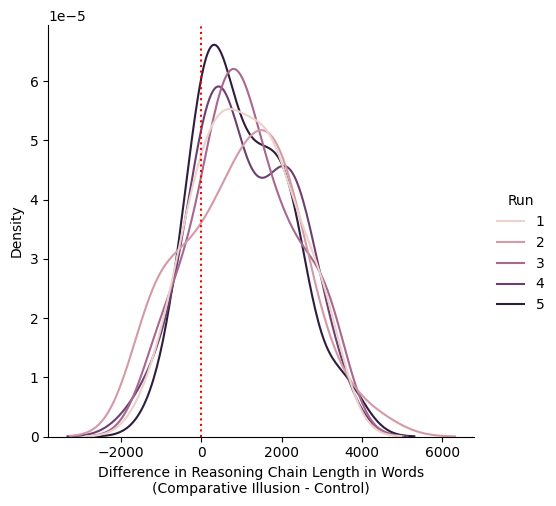

In [36]:
ci_data['Run'] = ci_data['run']
sns.displot(data=ci_data, x='thought_len_diff', hue='Run', kind='kde')
# Add a vertical line at 0:
plt.axvline(0, color='red', linestyle='dotted')
plt.xlabel("Difference in Reasoning Chain Length in Words\n(Comparative Illusion - Control)")

In [49]:
# Now do bootstrapped CIs for each run, estimating the mean difference in thought lengths:
for run in [1,2,3,4,5]:
    run_df = ci_data[ci_data['Run'] == run]
    thought_len_difference_bCIs = bootstrap((run_df['thought_len_diff'],), np.mean, confidence_level=0.95, n_resamples=10000, method='percentile', random_state=3535)
    print(f"Run {run}: Mean difference in thought lengths: {np.mean(run_df['thought_len_diff'])}")
    print(f"Run {run}: 95% C.I. of difference in thought lengths: {thought_len_difference_bCIs.confidence_interval}")
    print("\n")

Run 1: Mean difference in thought lengths: 1102.8125
Run 1: 95% C.I. of difference in thought lengths: ConfidenceInterval(low=np.float64(767.7270833333333), high=np.float64(1428.6552083333331))


Run 2: Mean difference in thought lengths: 1001.2291666666666
Run 2: 95% C.I. of difference in thought lengths: ConfidenceInterval(low=np.float64(611.0062500000001), high=np.float64(1391.4833333333333))


Run 3: Mean difference in thought lengths: 1087.6875
Run 3: 95% C.I. of difference in thought lengths: ConfidenceInterval(low=np.float64(749.0614583333333), high=np.float64(1416.625520833333))


Run 4: Mean difference in thought lengths: 1067.9375
Run 4: 95% C.I. of difference in thought lengths: ConfidenceInterval(low=np.float64(719.8713541666667), high=np.float64(1402.4364583333331))


Run 5: Mean difference in thought lengths: 1044.5625
Run 5: 95% C.I. of difference in thought lengths: ConfidenceInterval(low=np.float64(739.2838541666667), high=np.float64(1366.8567708333333))




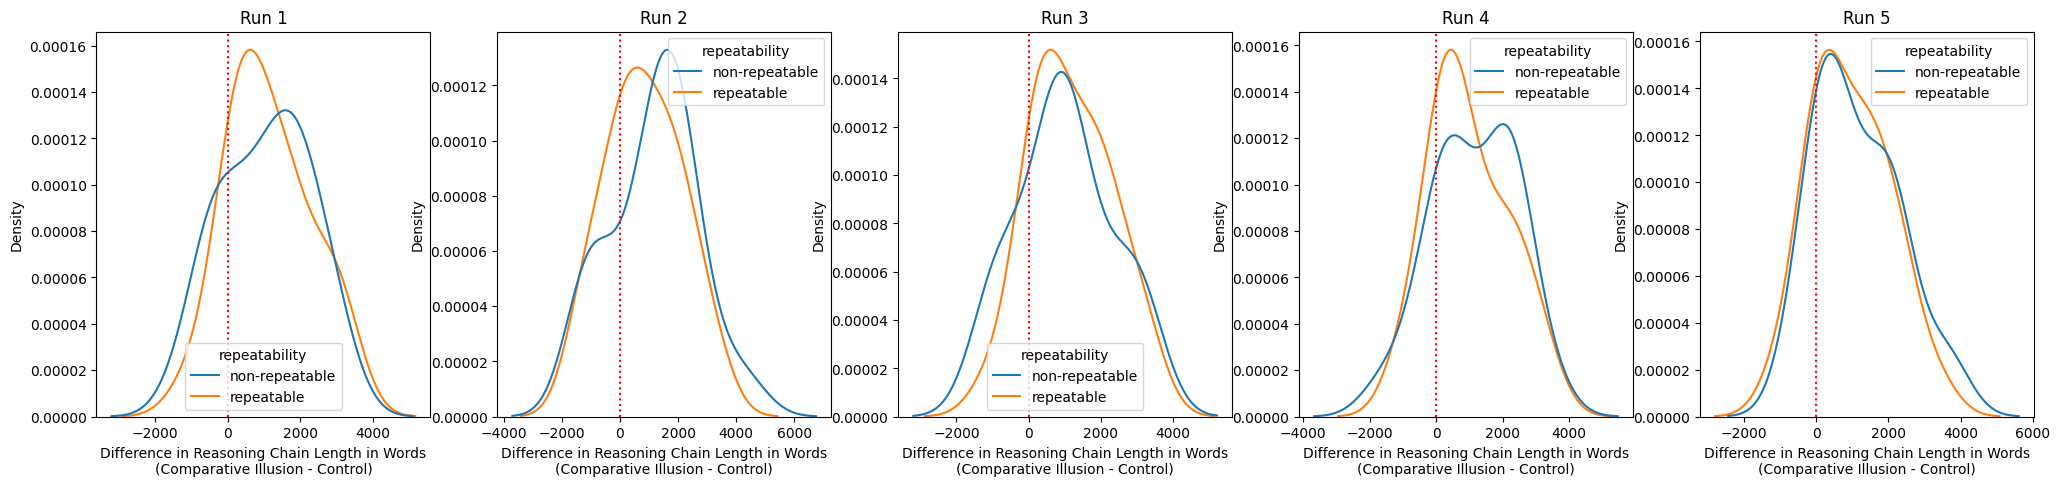

In [42]:
fig, axs = plt.subplots(1, 5, figsize=(25, 5))

for run in [1,2,3,4,5]:
    run_df = ci_data[ci_data['Run'] == run]
    sns.kdeplot(data=run_df, x='thought_len_diff', hue='repeatability', fill=False, ax=axs[run-1])
    axs[run-1].set_title(f"Run {run}")
    axs[run-1].set_xlabel("Difference in Reasoning Chain Length in Words\n(Comparative Illusion - Control)")
    # Add a vertical line at 0:
    axs[run-1].axvline(0, color='red', linestyle='dotted')



In [43]:
# Now do bootstrapped CIs for each run, comparing thought_len_diff between repeatable vs. non-repeatable:
for run in [1,2,3,4,5]:
    run_df = ci_data[ci_data['Run'] == run]
    repeatable_diffs = run_df[run_df['repeatability'] == 'repeatable']['thought_len_diff']
    non_repeatable_diffs = run_df[run_df['repeatability'] == 'non-repeatable']['thought_len_diff']
    repeatable_diffs_bCIs = bootstrap((repeatable_diffs,), np.mean, confidence_level=0.95, n_resamples=10000, method='percentile', random_state=3535)
    non_repeatable_diffs_bCIs = bootstrap((non_repeatable_diffs,), np.mean, confidence_level=0.95, n_resamples=10000, method='percentile', random_state=3535)
    print(f"Run {run}: Mean difference in thought lengths (repeatable): {np.mean(repeatable_diffs)}")
    print(f"Run {run}: 95% C.I. of difference in thought lengths (repeatable): {repeatable_diffs_bCIs.confidence_interval}")
    print(f"Run {run}: Mean difference in thought lengths (non-repeatable): {np.mean(non_repeatable_diffs)}")
    print(f"Run {run}: 95% C.I. of difference in thought lengths (non-repeatable): {non_repeatable_diffs_bCIs.confidence_interval}")
    print("\n")

Run 1: Mean difference in thought lengths (repeatable): 1148.9583333333333
Run 1: 95% C.I. of difference in thought lengths (repeatable): ConfidenceInterval(low=np.float64(710.790625), high=np.float64(1600.4583333333333))
Run 1: Mean difference in thought lengths (non-repeatable): 1056.6666666666667
Run 1: 95% C.I. of difference in thought lengths (non-repeatable): ConfidenceInterval(low=np.float64(573.996875), high=np.float64(1540.6677083333334))


Run 2: Mean difference in thought lengths (repeatable): 836.2916666666666
Run 2: 95% C.I. of difference in thought lengths (repeatable): ConfidenceInterval(low=np.float64(321.4958333333334), high=np.float64(1345.5874999999999))
Run 2: Mean difference in thought lengths (non-repeatable): 1166.1666666666667
Run 2: 95% C.I. of difference in thought lengths (non-repeatable): ConfidenceInterval(low=np.float64(584.129166666667), high=np.float64(1753.5968749999997))


Run 3: Mean difference in thought lengths (repeatable): 1170.6666666666667
Run 3

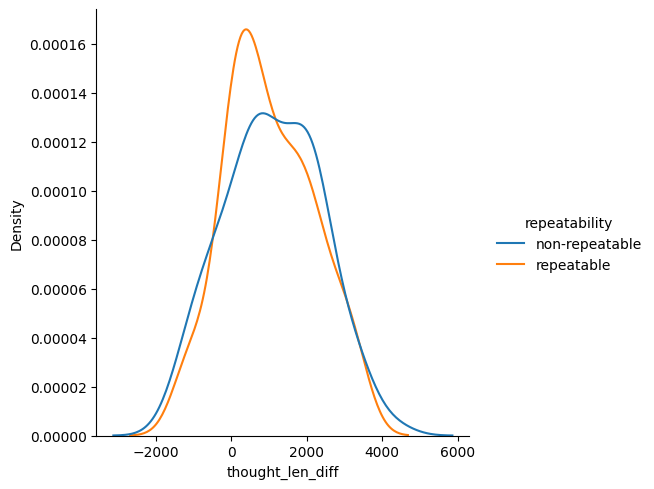

In [ ]:


sns.displot(data=ci_data, x='thought_len_diff', hue='repeatability', kind='kde')